<a href="https://colab.research.google.com/github/aimancsv/Big-Data-Predictive-Analytics-for-NBA-Player-Evaluation-Using-AI-Modeling/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Big Data Predictive Analytics for NBA Player Evaluation Using AI Modeling

In [ ]:
!pip install scikit-optimize

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import seaborn as sns
from matplotlib.ticker import FuncFormatter


from skopt import BayesSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, cross_val_predict, KFold

In [ ]:
df = pd.read_csv('/content/NBA_Player_Stats.csv')
sal = pd.read_csv('/content/nba-salaries.csv')
print(f"df shape: {df.shape}\n salaries:{sal.shape}")

df shape: (14573, 31)
 salaries:(9456, 6)


# Data Understanding


In [ ]:
# Get basic information about the player stats dataset
print("Player Stats Info:")
print(df.info())

# Get basic information about the salaries dataset
print("\nSalaries Info:")
print(sal.info())

Player Stats Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14573 entries, 0 to 14572
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rk      14573 non-null  int64  
 1   Player  14573 non-null  object 
 2   Pos     14573 non-null  object 
 3   Age     14573 non-null  int64  
 4   Tm      14573 non-null  object 
 5   G       14573 non-null  int64  
 6   GS      14573 non-null  int64  
 7   MP      14573 non-null  float64
 8   FG      14573 non-null  float64
 9   FGA     14573 non-null  float64
 10  FG%     14485 non-null  float64
 11  3P      14573 non-null  float64
 12  3PA     14573 non-null  float64
 13  3P%     12375 non-null  float64
 14  2P      14573 non-null  float64
 15  2PA     14573 non-null  float64
 16  2P%     14419 non-null  float64
 17  eFG%    14485 non-null  float64
 18  FT      14573 non-null  float64
 19  FTA     14573 non-null  float64
 20  FT%     13824 non-null  float64
 21  ORB     14573 no

In [ ]:
# Display the first few rows of the player stats dataset
print("Player Stats Head:")
print(df.head())

# Display the first few rows of the salaries dataset
print("\nSalaries Head:")
print(sal.head())

Player Stats Head:
   Rk               Player Pos  Age   Tm   G  GS    MP   FG   FGA  ...  ORB  \
0   1   Mahmoud Abdul-Rauf  PG   28  SAC  31   0  17.1  3.3   8.8  ...  0.2   
1   2    Tariq Abdul-Wahad  SG   23  SAC  59  16  16.3  2.4   6.1  ...  0.7   
2   3  Shareef Abdur-Rahim  SF   21  VAN  82  82  36.0  8.0  16.4  ...  2.8   
3   4       Cory Alexander  PG   24  TOT  60  22  21.6  2.9   6.7  ...  0.3   
4   4       Cory Alexander  PG   24  SAS  37   3  13.5  1.6   3.9  ...  0.2   

   DRB  TRB  AST  STL  BLK  TOV   PF   PTS       Year  
0  1.0  1.2  1.9  0.5  0.0  0.6  1.0   7.3  1997-1998  
1  1.2  2.0  0.9  0.6  0.2  1.1  1.4   6.4  1997-1998  
2  4.3  7.1  2.6  1.1  0.9  3.1  2.5  22.3  1997-1998  
3  2.2  2.4  3.5  1.2  0.2  1.9  1.6   8.1  1997-1998  
4  1.1  1.3  1.9  0.7  0.1  1.3  1.4   4.5  1997-1998  

[5 rows x 31 columns]

Salaries Head:
   rank              name position                    team    salary  season
0     1  Shaquille O'Neal        C      Los Angeles La

In [ ]:
# Summary statistics for the player stats dataset
print("Summary Statistics for Player Stats:")
print(df.describe())


Summary Statistics for Player Stats:
                 Rk           Age             G            GS            MP  \
count  14573.000000  14573.000000  14573.000000  14573.000000  14573.000000   
mean     244.332876     26.705483     45.544500     21.565429     19.623626   
std      139.596859      4.252495     26.110389     27.035594      9.957188   
min        1.000000     18.000000      1.000000      0.000000      0.000000   
25%      124.000000     23.000000     22.000000      0.000000     11.400000   
50%      243.000000     26.000000     48.000000      7.000000     18.900000   
75%      361.000000     30.000000     70.000000     39.000000     27.700000   
max      605.000000     44.000000     85.000000     83.000000     43.700000   

                 FG           FGA           FG%            3P           3PA  \
count  14573.000000  14573.000000  14485.000000  14573.000000  14573.000000   
mean       2.932046      6.598586      0.432377      0.590894      1.703637   
std        2.1

In [ ]:
# Summary statistics for the salaries dataset
print("\nSummary Statistics for Salaries:")
print(sal.describe())


Summary Statistics for Salaries:
              rank        salary       season
count  9456.000000  9.456000e+03  9456.000000
mean    250.483714  4.486115e+06  2011.438029
std     159.477367  5.366191e+06     5.623698
min       1.000000  2.692000e+03  2000.000000
25%     113.000000  9.152430e+05  2007.000000
50%     238.000000  2.351330e+06  2012.000000
75%     374.000000  5.822036e+06  2016.000000
max     699.000000  4.023176e+07  2020.000000


In [ ]:
# Check for duplicates in the player stats dataset
print("Duplicates in Player Stats:")
print(df.duplicated().sum())

# Check for duplicates in the salaries dataset
print("\nDuplicates in Salaries:")
print(sal.duplicated().sum())

Duplicates in Player Stats:
0

Duplicates in Salaries:
0


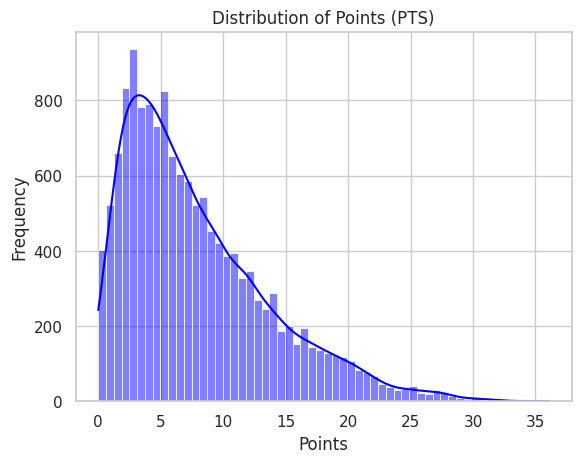

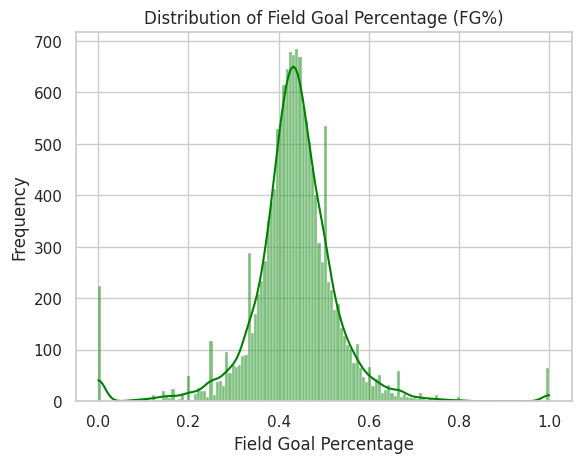

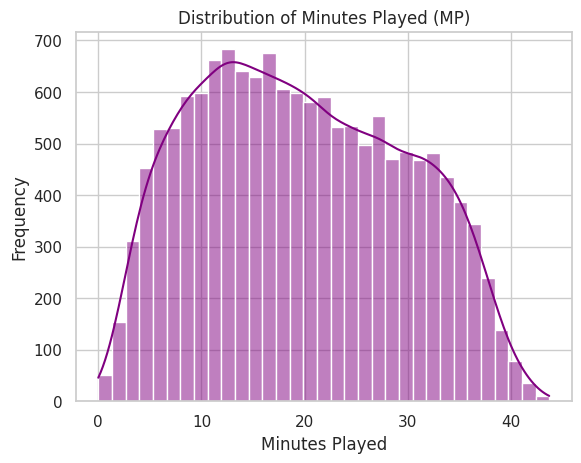

In [ ]:
# Plotting the distribution of Points (PTS)
sns.histplot(df['PTS'], kde=True, color='blue')
plt.title('Distribution of Points (PTS)')
plt.xlabel('Points')
plt.ylabel('Frequency')
plt.show()

# Plotting the distribution of Field Goal Percentage (FG%)
sns.histplot(df['FG%'], kde=True, color='green')
plt.title('Distribution of Field Goal Percentage (FG%)')
plt.xlabel('Field Goal Percentage')
plt.ylabel('Frequency')
plt.show()

# Plotting the distribution of Minutes Played (MP)
sns.histplot(df['MP'], kde=True, color='purple')
plt.title('Distribution of Minutes Played (MP)')
plt.xlabel('Minutes Played')
plt.ylabel('Frequency')
plt.show()

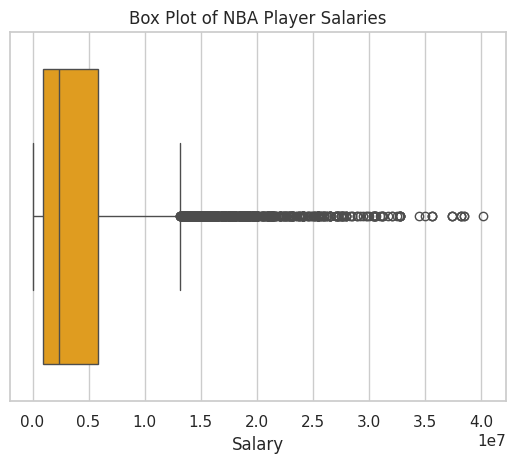

In [ ]:
# Box plot of salaries
sns.boxplot(x=sal['salary'], color='orange')
plt.title('Box Plot of NBA Player Salaries')
plt.xlabel('Salary')
plt.show()

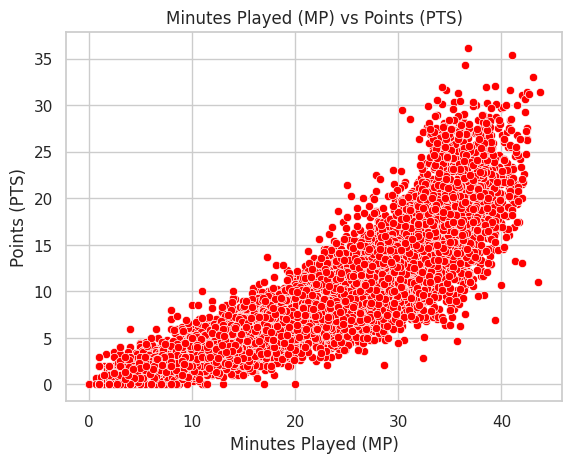

In [ ]:
# Scatter plot of Minutes Played (MP) vs Points (PTS)
sns.scatterplot(x=df['MP'], y=df['PTS'], color='red')
plt.title('Minutes Played (MP) vs Points (PTS)')
plt.xlabel('Minutes Played (MP)')
plt.ylabel('Points (PTS)')
plt.show()

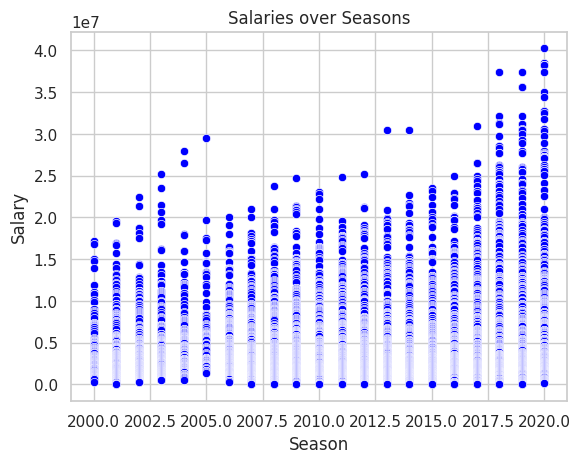

In [ ]:
# Scatter plot of Season vs Salary
sns.scatterplot(x=sal['season'], y=sal['salary'], color='blue')
plt.title('Salaries over Seasons')
plt.xlabel('Season')
plt.ylabel('Salary')
plt.show()

# Data Cleaning and Preprocessing of Player Stat Dataset


In [ ]:
df.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
0,1,Mahmoud Abdul-Rauf,PG,28,SAC,31,0,17.1,3.3,8.8,...,0.2,1.0,1.2,1.9,0.5,0.0,0.6,1.0,7.3,1997-1998
1,2,Tariq Abdul-Wahad,SG,23,SAC,59,16,16.3,2.4,6.1,...,0.7,1.2,2.0,0.9,0.6,0.2,1.1,1.4,6.4,1997-1998
2,3,Shareef Abdur-Rahim,SF,21,VAN,82,82,36.0,8.0,16.4,...,2.8,4.3,7.1,2.6,1.1,0.9,3.1,2.5,22.3,1997-1998
3,4,Cory Alexander,PG,24,TOT,60,22,21.6,2.9,6.7,...,0.3,2.2,2.4,3.5,1.2,0.2,1.9,1.6,8.1,1997-1998
4,4,Cory Alexander,PG,24,SAS,37,3,13.5,1.6,3.9,...,0.2,1.1,1.3,1.9,0.7,0.1,1.3,1.4,4.5,1997-1998


In [ ]:
df.dtypes

,0
Rk,int64
Player,object
Pos,object
Age,int64
Tm,object
G,int64
GS,int64
MP,float64
FG,float64
FGA,float64


In [ ]:
print(df.isna().sum())

Rk           0
Player       0
Pos          0
Age          0
Tm           0
G            0
GS           0
MP           0
FG           0
FGA          0
FG%         88
3P           0
3PA          0
3P%       2198
2P           0
2PA          0
2P%        154
eFG%        88
FT           0
FTA          0
FT%        749
ORB          0
DRB          0
TRB          0
AST          0
STL          0
BLK          0
TOV          0
PF           0
PTS          0
Year         0
dtype: int64


In [ ]:
# List of columns to fill NaN values with the player's mean
columns_to_fill = ['FG%', '3P%', '2P%', 'FT%','eFG%']

# Group by 'Player' and calculate the mean for each group
player_means = df.groupby('Player')[columns_to_fill].transform('mean')

# Fill NaN values in the original DataFrame with the player's mean values
df[columns_to_fill] = df[columns_to_fill].fillna(player_means).fillna(0)

print(df.isna().sum())

Rk        0
Player    0
Pos       0
Age       0
Tm        0
G         0
GS        0
MP        0
FG        0
FGA       0
FG%       0
3P        0
3PA       0
3P%       0
2P        0
2PA       0
2P%       0
eFG%      0
FT        0
FTA       0
FT%       0
ORB       0
DRB       0
TRB       0
AST       0
STL       0
BLK       0
TOV       0
PF        0
PTS       0
Year      0
dtype: int64


In [ ]:
# prompt: print year unique value

print(df['Year'].unique())


['1997-1998' '1998-1999' '1999-2000' '2000-2001' '2001-2002' '2002-2003'
 '2003-2004' '2004-2005' '2005-2006' '2006-2007' '2007-2008' '2008-2009'
 '2009-2010' '2010-2011' '2011-2012' '2012-2013' '2013-2014' '2014-2015'
 '2015-2016' '2016-2017' '2017-2018' '2018-2019' '2019-2020' '2020-2021'
 '2021-2022']


In [ ]:
# Extract the start year from the 'Year' column
df['Start_Year'] = df['Year'].str.split('-').str[0].astype(int)

df['Start_Year'] = pd.to_datetime(df['Start_Year'], format='%Y').dt.year

# Group by 'Player' and find the minimum year for each player (the year they started their career)
player_start_year = df.groupby('Player')['Start_Year'].min().reset_index()

# Filter for players who started in 2003 or later
player_start_year_filtered = player_start_year[player_start_year['Start_Year'] >= 2003]

# Merge back with the original DataFrame to get all rows for the filtered players
filtered_df = df.merge(player_start_year_filtered, on='Player', suffixes=('', '_min'))

# Drop the 'Start_Year' column if it's no longer needed
filtered_df = filtered_df.drop(columns=['Start_Year_min'])

# Now you should have both the original and the minimum start year columns after the merge
# Sort the filtered DataFrame by the original Start_Year
filtered_df = filtered_df.sort_values(by='Start_Year')

# Check the result
filtered_df.head(10)

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year,Start_Year
0,9,Carmelo Anthony,SF,19,DEN,82,82,36.5,7.6,17.9,...,3.8,6.1,2.8,1.2,0.5,3.0,2.7,21.0,2003-2004,2003
94,73,Maurice Carter,SG,27,NOH,6,0,10.0,1.0,3.5,...,1.0,1.3,0.3,0.0,0.0,0.5,0.8,3.3,2003-2004,2003
93,73,Maurice Carter,SG,27,LAL,4,0,12.5,1.3,3.5,...,0.8,0.8,0.5,0.0,0.0,1.5,1.3,5.5,2003-2004,2003
92,73,Maurice Carter,SG,27,TOT,10,0,11.0,1.1,3.5,...,0.9,1.1,0.4,0.0,0.0,0.9,1.0,4.2,2003-2004,2003
174,131,T.J. Ford,PG,20,MIL,55,55,26.8,2.8,7.2,...,2.5,3.2,6.5,1.1,0.1,2.5,2.2,7.1,2003-2004,2003
288,210,Britton Johnsen,C,24,ORL,20,4,14.5,0.9,3.0,...,1.5,2.3,0.6,0.4,0.1,0.7,1.4,2.1,2003-2004,2003
80,71,Matt Carroll,SG,23,SAS,3,0,7.3,0.7,1.7,...,0.7,1.0,0.3,0.3,0.0,1.3,1.7,2.0,2003-2004,2003
79,71,Matt Carroll,SG,23,POR,13,0,3.7,0.4,0.8,...,0.2,0.2,0.1,0.0,0.0,0.2,0.2,1.0,2003-2004,2003
78,71,Matt Carroll,SG,23,TOT,16,0,4.4,0.4,1.0,...,0.3,0.4,0.1,0.1,0.0,0.4,0.5,1.2,2003-2004,2003
290,216,Linton Johnson,SF,23,CHI,41,20,17.9,1.8,5.0,...,3.0,4.5,0.7,0.9,0.8,0.9,2.2,4.2,2003-2004,2003


In [ ]:
filtered_df['Tm'].unique()

array(['DEN', 'NOH', 'LAL', 'TOT', 'MIL', 'ORL', 'SAS', 'POR', 'CHI',
       'PHO', 'WAS', 'HOU', 'MEM', 'IND', 'TOR', 'UTA', 'CLE', 'BOS',
       'DAL', 'SEA', 'ATL', 'MIN', 'PHI', 'MIA', 'LAC', 'NJN', 'GSW',
       'SAC', 'NYK', 'DET', 'CHA', 'NOK', 'OKC', 'BRK', 'NOP', 'CHO'],
      dtype=object)

# Data Cleaning and Preprocessing of Salaries Dataset

In [ ]:
sal.head()

,rank,name,position,team,salary,season
0,1,Shaquille O'Neal,C,Los Angeles Lakers,17142000,2000
1,2,Kevin Garnett,PF,Minnesota Timberwolves,16806000,2000
2,3,Alonzo Mourning,C,Miami Heat,15004000,2000
3,4,Juwan Howard,PF,Washington Wizards,15000000,2000
4,5,Scottie Pippen,SF,Portland Trail Blazers,14795000,2000


In [ ]:
print(sal.isna().sum())

rank        0
name        0
position    0
team        0
salary      0
season      0
dtype: int64


In [ ]:
# prompt: count 0

(sal == 0).sum()


,0
rank,0
name,0
position,0
team,0
salary,0
season,0


In [ ]:
sal.dtypes

,0
rank,int64
name,object
position,object
team,object
salary,int64
season,int64


# Merge and Analysis

In [ ]:
df['Tm'].unique()

array(['SAC', 'VAN', 'TOT', 'SAS', 'DEN', 'MIL', 'CLE', 'ATL', 'POR',
       'BOS', 'ORL', 'UTA', 'DAL', 'SEA', 'GSW', 'CHH', 'MIA', 'LAC',
       'PHI', 'LAL', 'NJN', 'IND', 'TOR', 'CHI', 'NYK', 'PHO', 'HOU',
       'MIN', 'WAS', 'DET', 'MEM', 'NOH', 'CHA', 'NOK', 'OKC', 'BRK',
       'NOP', 'CHO'], dtype=object)

In [ ]:
sal['team'].unique()

array(['Los Angeles Lakers', 'Minnesota Timberwolves', 'Miami Heat',
       'Washington Wizards', 'Portland Trail Blazers', 'Utah Jazz',
       'New York Knicks', 'Seattle SuperSonics', 'Cleveland Cavaliers',
       'Denver Nuggets', 'Boston Celtics', 'Vancouver Grizzlies',
       'Philadelphia 76ers', 'Phoenix Suns', 'Milwaukee Bucks',
       'New Jersey Nets', 'Sacramento Kings', 'Charlotte Hornets',
       'Dallas Mavericks', 'Atlanta Hawks', 'Golden State Warriors',
       'Detroit Pistons', 'Indiana Pacers', 'Orlando Magic',
       'Houston Rockets', 'Los Angeles Clippers', 'Chicago Bulls',
       'Toronto Raptors', 'San Antonio Spurs', 'Memphis Grizzlies',
       'LA Clippers', 'New Orleans Hornets', 'Charlotte Bobcats',
       'NO/Oklahoma City\r\n Hornets', 'Brooklyn Nets',
       'NO/Oklahoma City Hornets', 'New Orleans Pelicans',
       'Oklahoma City Thunder', 'null Unknown', 'Madrid Real Madrid',
       'Bilbao Basket Bilbao Basket', 'Fenerbahce Ulker Fenerbahce Ulker',
   

In [ ]:
df_filtered = filtered_df[filtered_df['Tm'] != 'TOT']

In [ ]:
team_mapping = {
    'SAC': 'Sacramento Kings',
    'VAN': 'Vancouver Grizzlies',
    'SAS': 'San Antonio Spurs',
    'DEN': 'Denver Nuggets',
    'MIL': 'Milwaukee Bucks',
    'CLE': 'Cleveland Cavaliers',
    'ATL': 'Atlanta Hawks',
    'POR': 'Portland Trail Blazers',
    'BOS': 'Boston Celtics',
    'ORL': 'Orlando Magic',
    'UTA': 'Utah Jazz',
    'DAL': 'Dallas Mavericks',
    'SEA': 'Seattle SuperSonics',
    'GSW': 'Golden State Warriors',
    'CHH': 'Charlotte Hornets',
    'MIA': 'Miami Heat',
    'LAC': 'Los Angeles Clippers',
    'PHI': 'Philadelphia 76ers',
    'LAL': 'Los Angeles Lakers',
    'NJN': 'New Jersey Nets',
    'IND': 'Indiana Pacers',
    'TOR': 'Toronto Raptors',
    'CHI': 'Chicago Bulls',
    'NYK': 'New York Knicks',
    'PHO': 'Phoenix Suns',
    'HOU': 'Houston Rockets',
    'MIN': 'Minnesota Timberwolves',
    'WAS': 'Washington Wizards',
    'DET': 'Detroit Pistons',
    'MEM': 'Memphis Grizzlies',
    'NOH': 'New Orleans Hornets',
    'CHA': 'Charlotte Hornets',
    'NOK': 'NO/Oklahoma City Hornets',
    'OKC': 'Oklahoma City Thunder',
    'BRK': 'Brooklyn Nets',
    'NOP': 'New Orleans Pelicans',
    'CHO': 'Charlotte Hornets'
}

In [ ]:
df_filtered['full_team_name'] = df_filtered['Tm'].map(team_mapping)
df_filtered.head()

<ipython-input-70-b05639f1f5f5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['full_team_name'] = df_filtered['Tm'].map(team_mapping)


,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,TRB,AST,STL,BLK,TOV,PF,PTS,Year,Start_Year,full_team_name
0,9,Carmelo Anthony,SF,19,DEN,82,82,36.5,7.6,17.9,...,6.1,2.8,1.2,0.5,3.0,2.7,21.0,2003-2004,2003,Denver Nuggets
94,73,Maurice Carter,SG,27,NOH,6,0,10.0,1.0,3.5,...,1.3,0.3,0.0,0.0,0.5,0.8,3.3,2003-2004,2003,New Orleans Hornets
93,73,Maurice Carter,SG,27,LAL,4,0,12.5,1.3,3.5,...,0.8,0.5,0.0,0.0,1.5,1.3,5.5,2003-2004,2003,Los Angeles Lakers
174,131,T.J. Ford,PG,20,MIL,55,55,26.8,2.8,7.2,...,3.2,6.5,1.1,0.1,2.5,2.2,7.1,2003-2004,2003,Milwaukee Bucks
288,210,Britton Johnsen,C,24,ORL,20,4,14.5,0.9,3.0,...,2.3,0.6,0.4,0.1,0.7,1.4,2.1,2003-2004,2003,Orlando Magic


In [ ]:
merged_df = df_filtered.merge(sal, left_on=['Player', 'full_team_name', 'Start_Year'],
                     right_on=['name', 'team', 'season'],
                     how='inner')
merged_df.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,PTS,Year,Start_Year,full_team_name,rank,name,position,team,salary,season
0,265,Jason Maxiell,C,23,DET,67,8,14.1,2.0,3.9,...,5.0,2006-2007,2006,Detroit Pistons,336,Jason Maxiell,PF,Detroit Pistons,905640,2006
1,101,Carlos Delfino,SG,24,DET,82,1,16.7,1.9,4.6,...,5.2,2006-2007,2006,Detroit Pistons,327,Carlos Delfino,SG,Detroit Pistons,969600,2006
2,427,Hakim Warrick,PF,24,MEM,82,43,26.2,4.5,8.7,...,12.7,2006-2007,2006,Memphis Grizzlies,297,Hakim Warrick,PF,Memphis Grizzlies,1196520,2006
3,430,Martell Webster,SF,20,POR,82,27,21.5,2.4,6.0,...,7.0,2006-2007,2006,Portland Trail Blazers,214,Martell Webster,SF,Portland Trail Blazers,2586120,2006
4,175,Luther Head,SG,24,HOU,80,10,27.6,3.8,8.8,...,10.9,2006-2007,2006,Houston Rockets,326,Luther Head,PG,Houston Rockets,975600,2006


In [ ]:
columns_to_drop = ['Rk','name', 'position', 'team', 'Start_Year']

# Drop the columns
merged_df = merged_df.drop(columns=columns_to_drop)

In [ ]:
print(merged_df.isna().sum())

Player            0
Pos               0
Age               0
Tm                0
G                 0
GS                0
MP                0
FG                0
FGA               0
FG%               0
3P                0
3PA               0
3P%               0
2P                0
2PA               0
2P%               0
eFG%              0
FT                0
FTA               0
FT%               0
ORB               0
DRB               0
TRB               0
AST               0
STL               0
BLK               0
TOV               0
PF                0
PTS               0
Year              0
full_team_name    0
rank              0
salary            0
season            0
dtype: int64


In [ ]:
merged_df.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,STL,BLK,TOV,PF,PTS,Year,full_team_name,rank,salary,season
0,Jason Maxiell,C,23,DET,67,8,14.1,2.0,3.9,0.500,...,0.4,0.9,0.8,1.6,5.0,2006-2007,Detroit Pistons,336,905640,2006
1,Carlos Delfino,SG,24,DET,82,1,16.7,1.9,4.6,0.415,...,0.6,0.1,0.7,1.2,5.2,2006-2007,Detroit Pistons,327,969600,2006
2,Hakim Warrick,PF,24,MEM,82,43,26.2,4.5,8.7,0.524,...,0.5,0.4,2.0,2.8,12.7,2006-2007,Memphis Grizzlies,297,1196520,2006
3,Martell Webster,SF,20,POR,82,27,21.5,2.4,6.0,0.396,...,0.4,0.2,0.9,1.5,7.0,2006-2007,Portland Trail Blazers,214,2586120,2006
4,Luther Head,SG,24,HOU,80,10,27.6,3.8,8.8,0.437,...,1.0,0.1,1.7,1.7,10.9,2006-2007,Houston Rockets,326,975600,2006


In [ ]:
# Exclude non-numeric columns before calculating the correlation matrix
numeric_df = merged_df.select_dtypes(include=['float64', 'int64'])

# Correlation matrix to see how performance metrics correlate with salary
correlation_matrix = numeric_df.corr()

# Display the sorted correlation with salary
sorted_correlation = correlation_matrix['salary'].sort_values(ascending=False)

sorted_correlation

,salary
salary,1.000000
PTS,0.502062
FG,0.489399
FGA,0.480298
TOV,0.446778
FT,0.439195
FTA,0.431633
Age,0.423379
DRB,0.420960
2P,0.417051


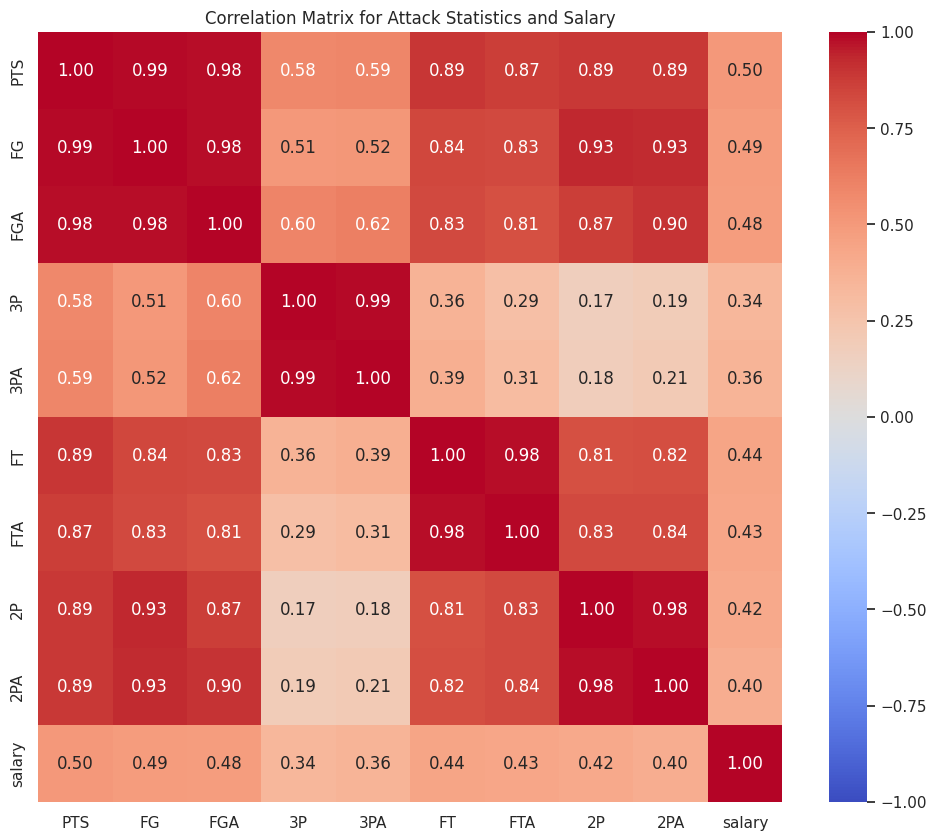

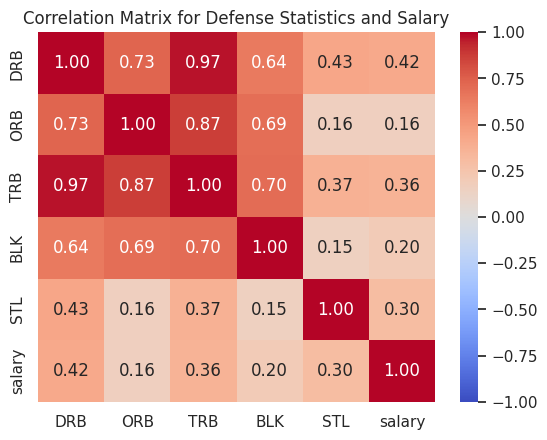

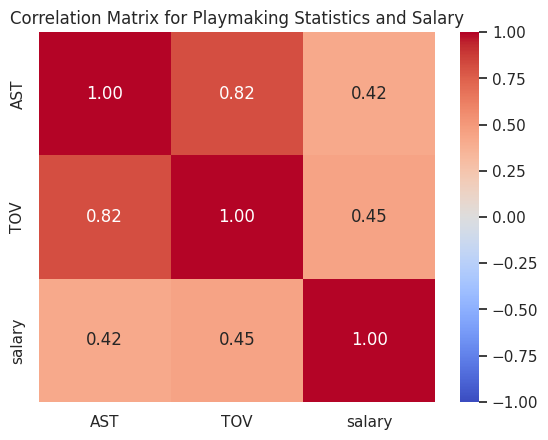

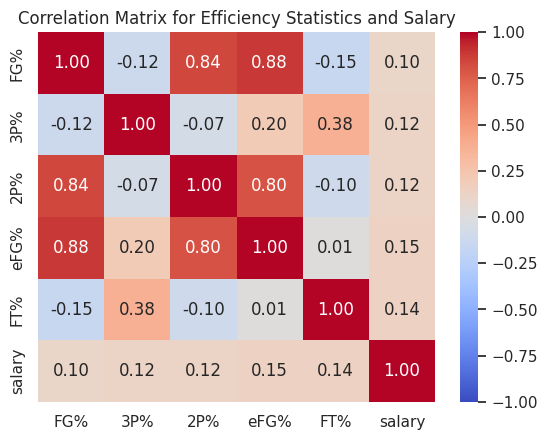

In [ ]:

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Attack-related statistics
attack_stats = ['PTS', 'FG', 'FGA', '3P', '3PA', 'FT', 'FTA', '2P', '2PA']
defense_stats = ['DRB', 'ORB', 'TRB', 'BLK', 'STL']
playmaking_stats = ['AST', 'TOV']
efficiency_stats = ['FG%', '3P%', '2P%', 'eFG%', 'FT%']

# Plot correlation heatmaps for different categories
def plot_correlation_matrix(stats, title):
    corr_matrix = merged_df[stats + ['salary']].corr()
    sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
    plt.title(title)
    plt.show()

# Attack Stats Correlation
plot_correlation_matrix(attack_stats, "Correlation Matrix for Attack Statistics and Salary")

# Defense Stats Correlation
plot_correlation_matrix(defense_stats, "Correlation Matrix for Defense Statistics and Salary")

# Playmaking Stats Correlation
plot_correlation_matrix(playmaking_stats, "Correlation Matrix for Playmaking Statistics and Salary")

# Efficiency Stats Correlation
plot_correlation_matrix(efficiency_stats, "Correlation Matrix for Efficiency Statistics and Salary")

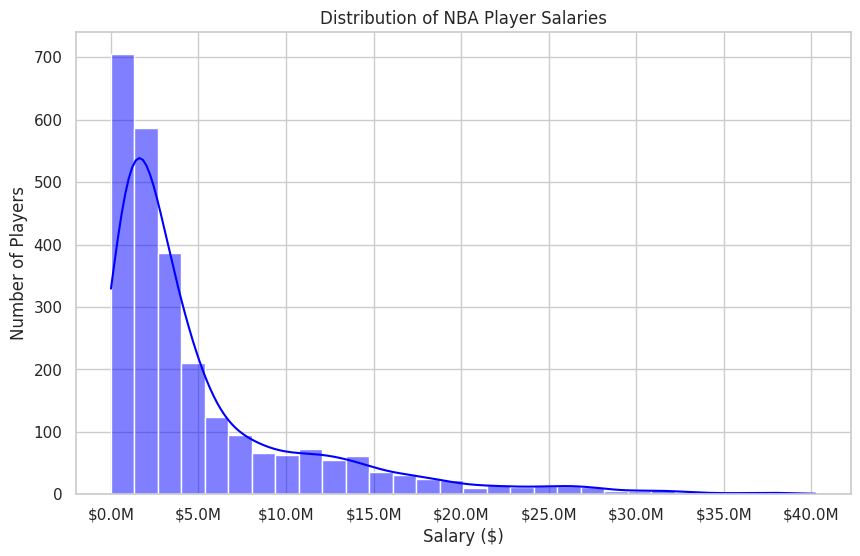

In [ ]:
# Function to convert salary to millions
def millions(x, pos):
    return '${:,.1f}M'.format(x * 1e-6)

# Set the plot size
plt.figure(figsize=(10, 6))

# Plot the distribution
sns.histplot(merged_df['salary'], kde=True, bins=30, color='blue')
plt.title('Distribution of NBA Player Salaries')
plt.xlabel('Salary ($)')
plt.ylabel('Number of Players')

# Apply the formatter to the x-axis
plt.gca().xaxis.set_major_formatter(FuncFormatter(millions))

plt.grid(True)
plt.show()

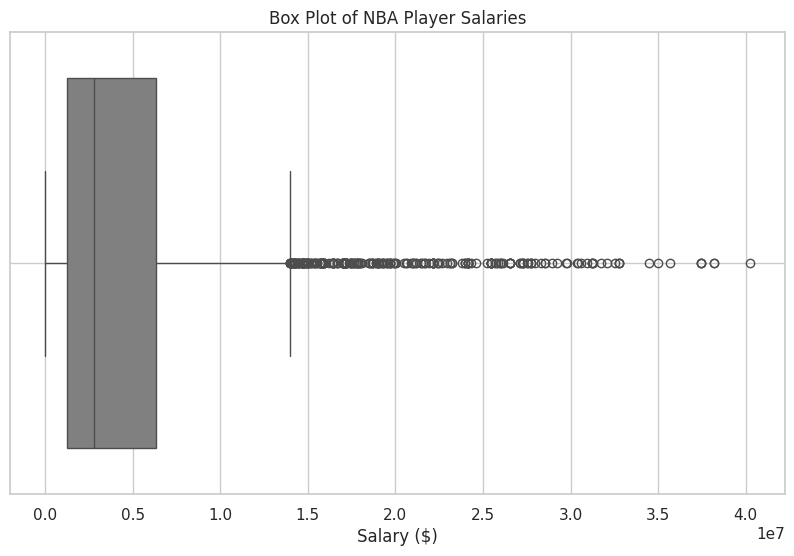

In [ ]:
# Set the plot size
plt.figure(figsize=(10, 6))

# Create the box plot
sns.boxplot(x=merged_df['salary'], color='grey')
plt.title('Box Plot of NBA Player Salaries')
plt.xlabel('Salary ($)')
plt.grid(True)

# Show the plot
plt.show()

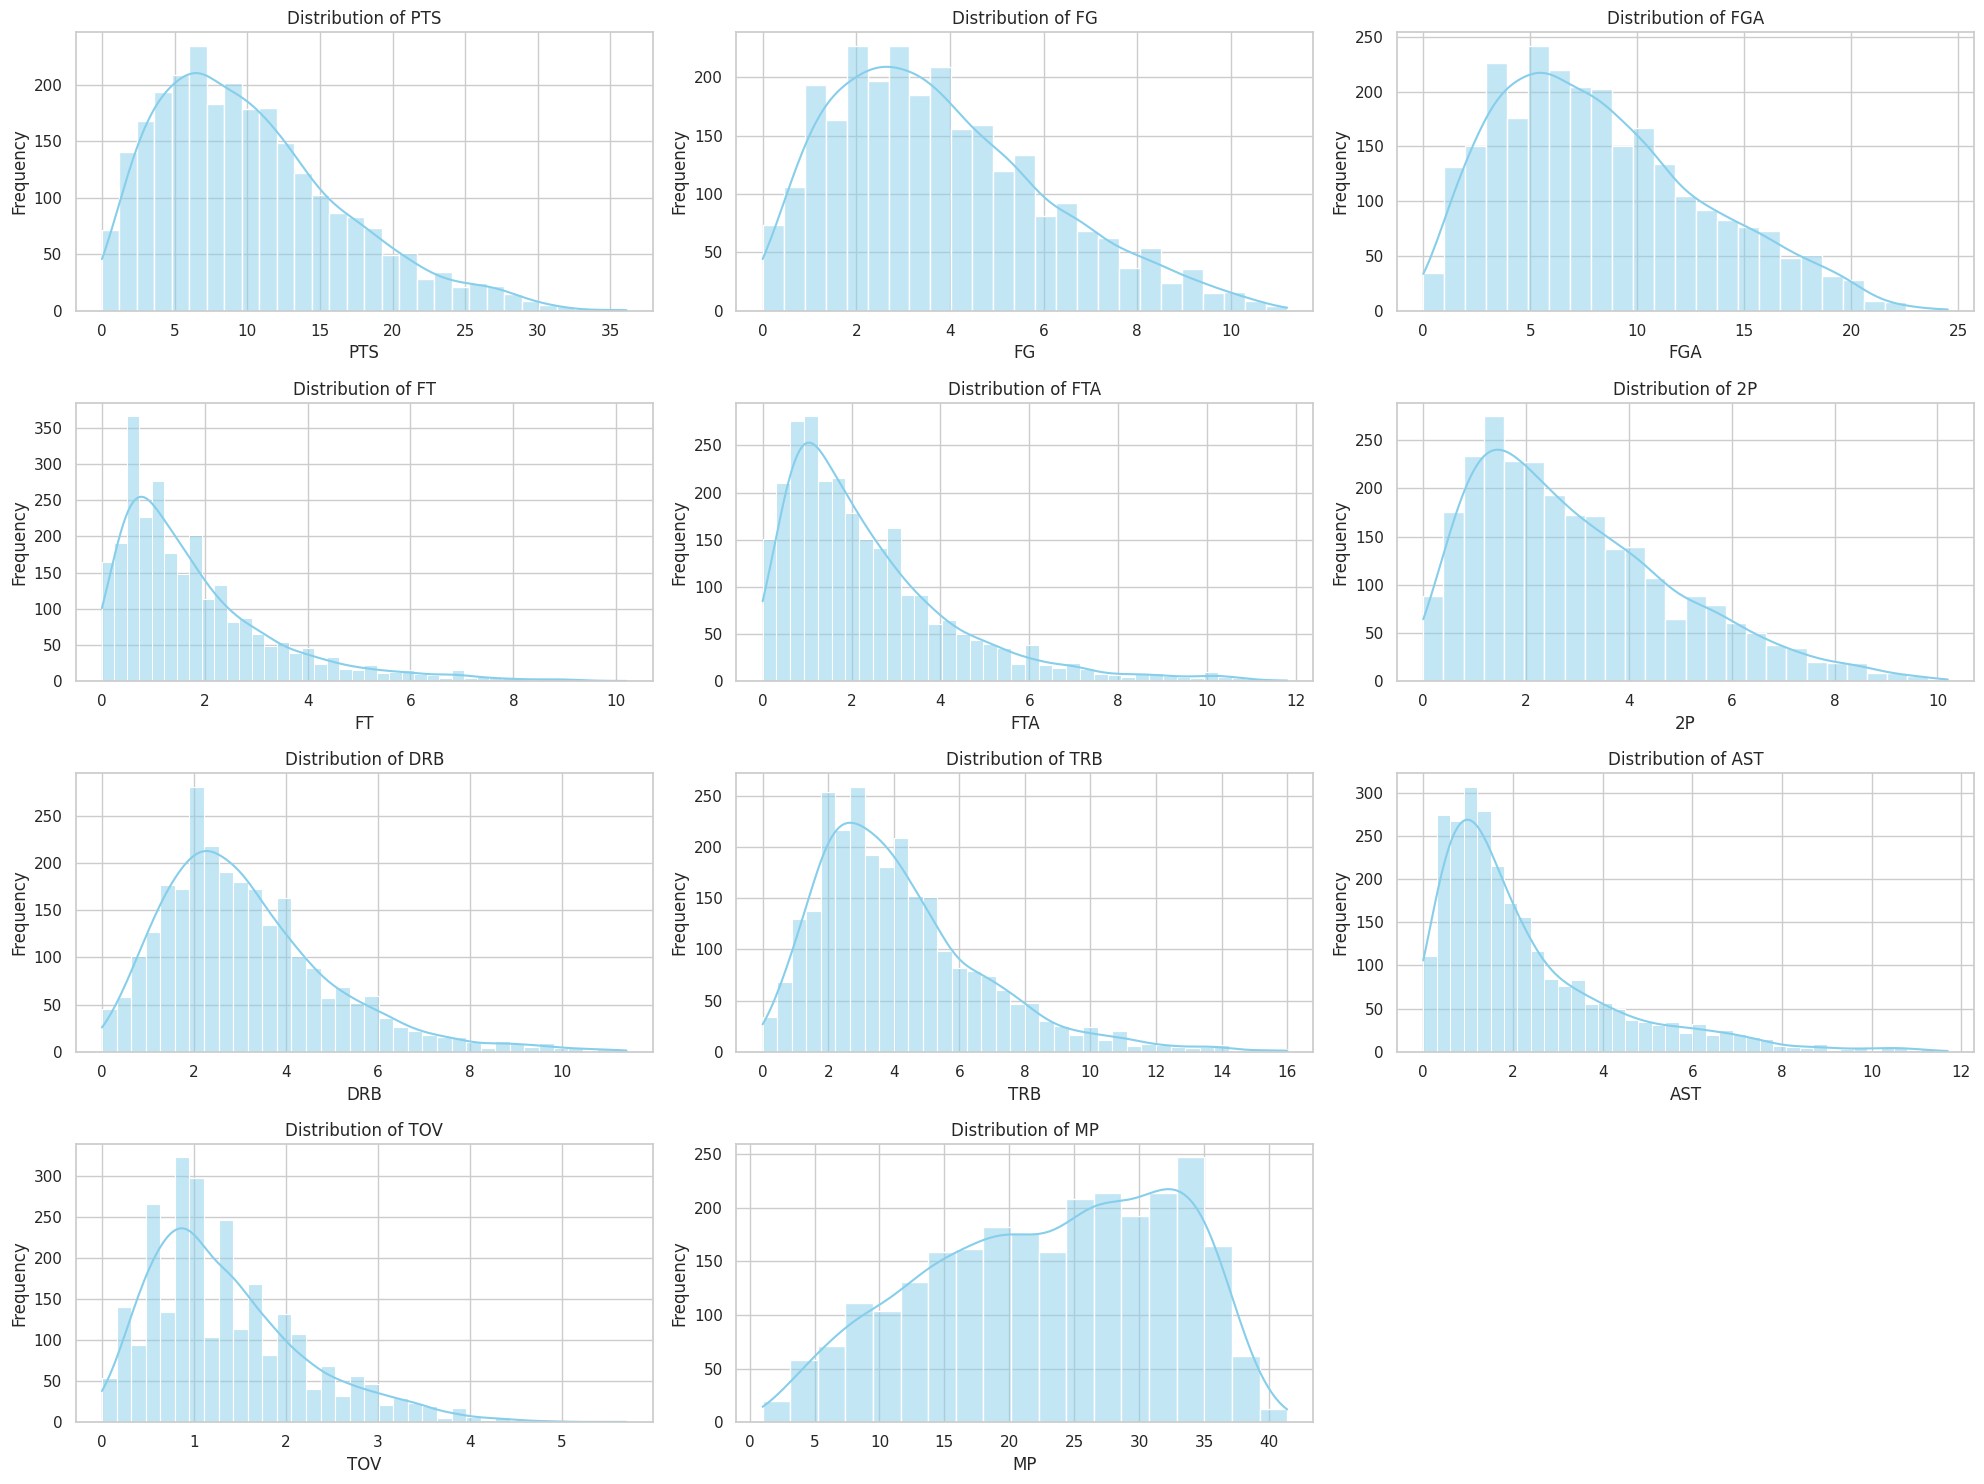

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting up the plot style
sns.set(style="whitegrid")

# List of features to plot from player stats dataset
features = ['PTS', 'FG', 'FGA', 'FT', 'FTA', '2P', 'DRB', 'TRB', 'AST', 'TOV', 'MP']

# Plotting the distribution of selected features in player stats dataset
plt.figure(figsize=(20, 15))
for i, feature in enumerate(features, 1):
    plt.subplot(4, 3, i)  # Adjust the grid size if needed
    sns.histplot(merged_df[feature], kde=True, color='skyblue')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [ ]:
# Set pandas option to display floats without scientific notation
pd.set_option('display.float_format', '{:.2f}'.format)

# Summary statistics of NBA player salaries in millions
salary_summary_millions = merged_df['salary'].describe()
print(salary_summary_millions)

# Reset pandas option if needed (optional)
pd.reset_option('display.float_format')

count       2645.00
mean     5205506.53
std      6219307.74
min         4608.00
25%      1260360.00
50%      2793960.00
75%      6344164.00
max     40231758.00
Name: salary, dtype: float64


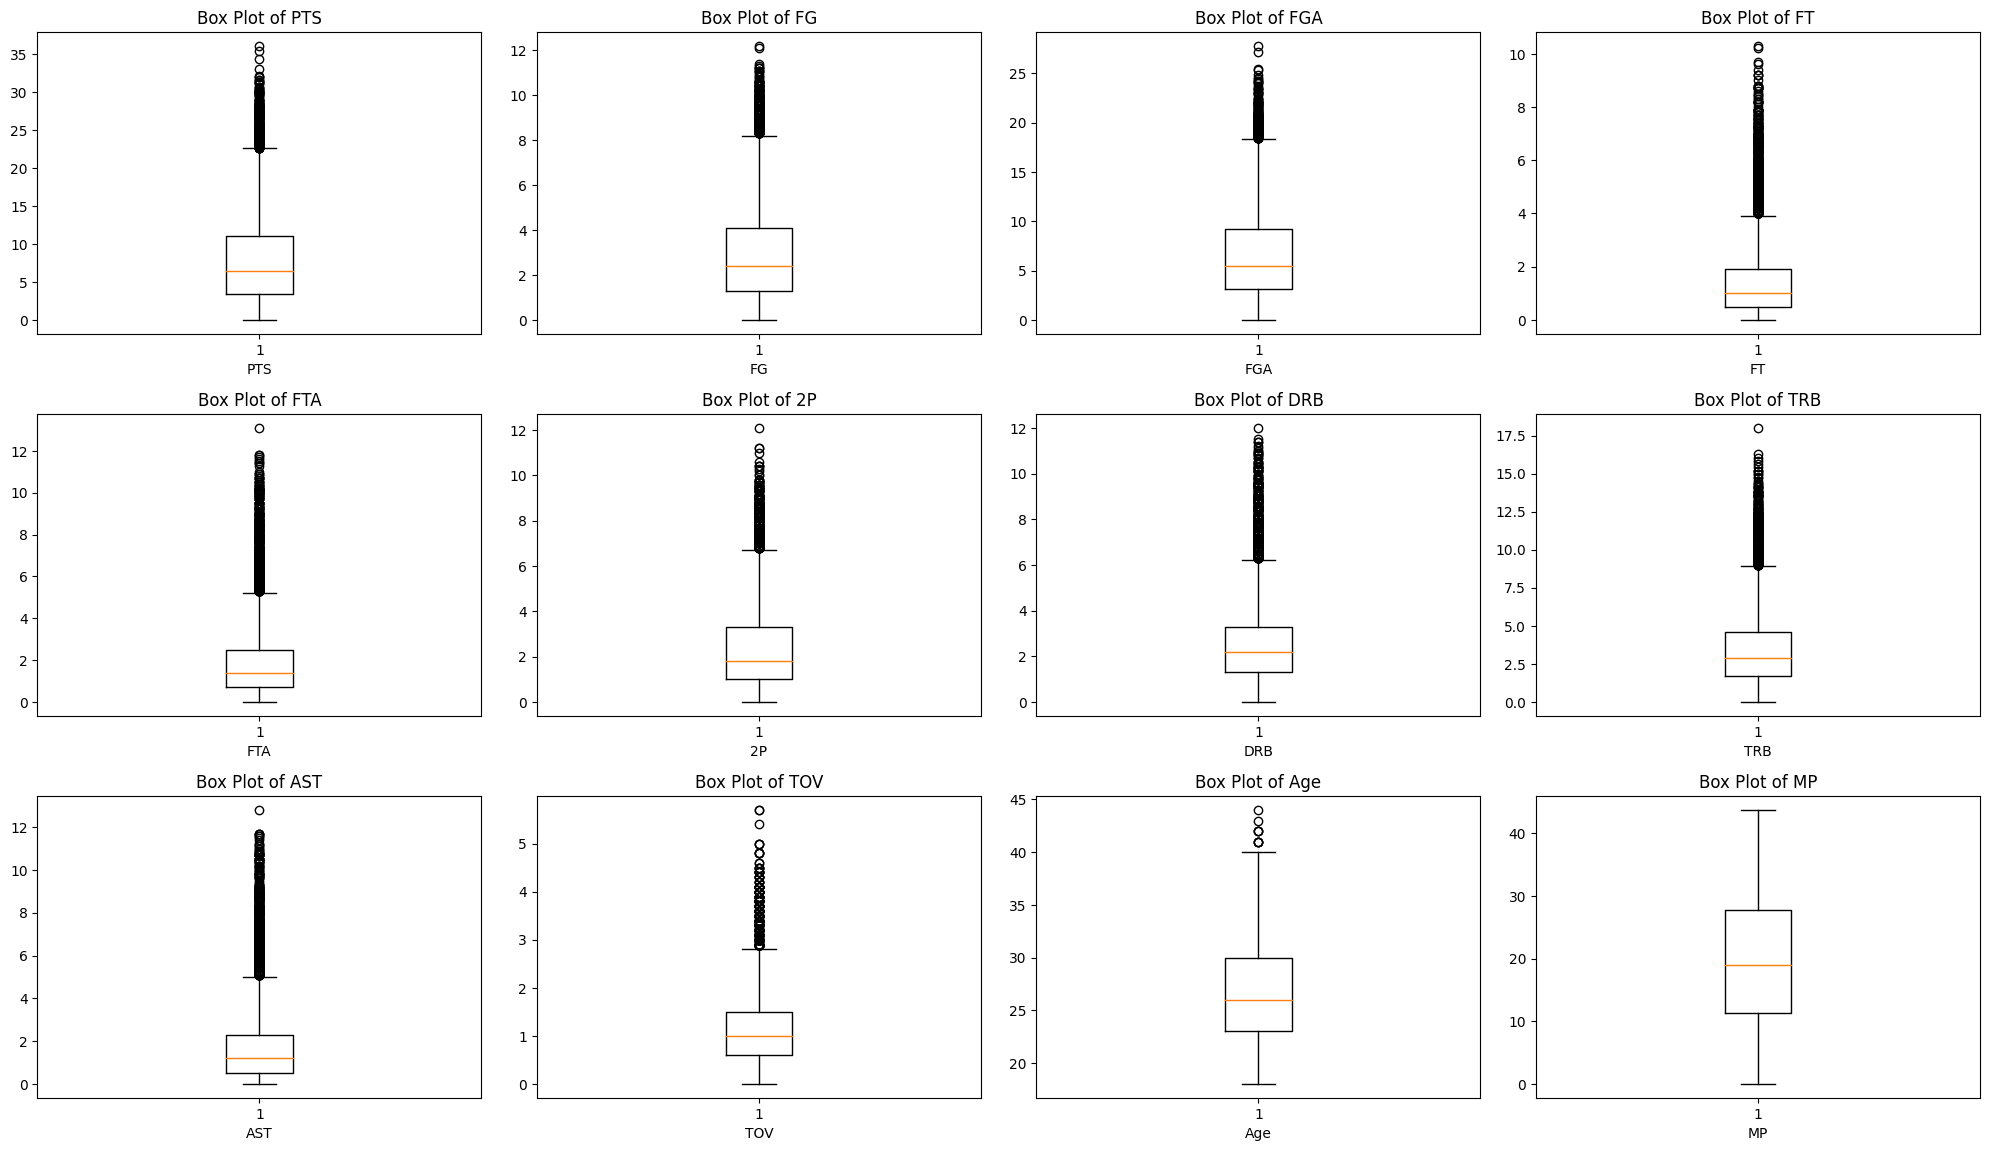

In [ ]:
# Features to analyze
features_to_analyze = ['PTS', 'FG', 'FGA', 'FT', 'FTA', '2P', 'DRB', 'TRB', 'AST', 'TOV', 'Age', 'MP']

# Plotting box plots for each feature before outlier removal
plt.figure(figsize=(20, 15))

for i, feature in enumerate(features_to_analyze, 1):
    plt.subplot(4, 4, i)
    plt.boxplot(df[feature])
    plt.title(f'Box Plot of {feature}')
    plt.xlabel(feature)

plt.tight_layout()
plt.show()

In [ ]:
# Function to remove outliers using IQR method
def remove_outliers_iqr(merged_df, features):
    for feature in features:
        Q1 = merged_df[feature].quantile(0.25)
        Q3 = merged_df[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Remove outliers
        merged_df = merged_df[(merged_df[feature] >= lower_bound) & (merged_df[feature] <= upper_bound)]

    return merged_df

# Apply outlier removal
df_clean = remove_outliers_iqr(merged_df, features_to_analyze)

# Checking the shape of the data before and after outlier removal
merged_df.shape, df_clean.shape

# Function to remove outliers using IQR method
def remove_outliers_iqr(df, features):
    for feature in features:
        Q1 = df[feature].quantile(0.25)
        Q3 = df[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Remove outliers
        df = df[(df[feature] >= lower_bound) & (df[feature] <= upper_bound)]

    return df

# Apply outlier removal
df_clean = remove_outliers_iqr(merged_df, features_to_analyze)

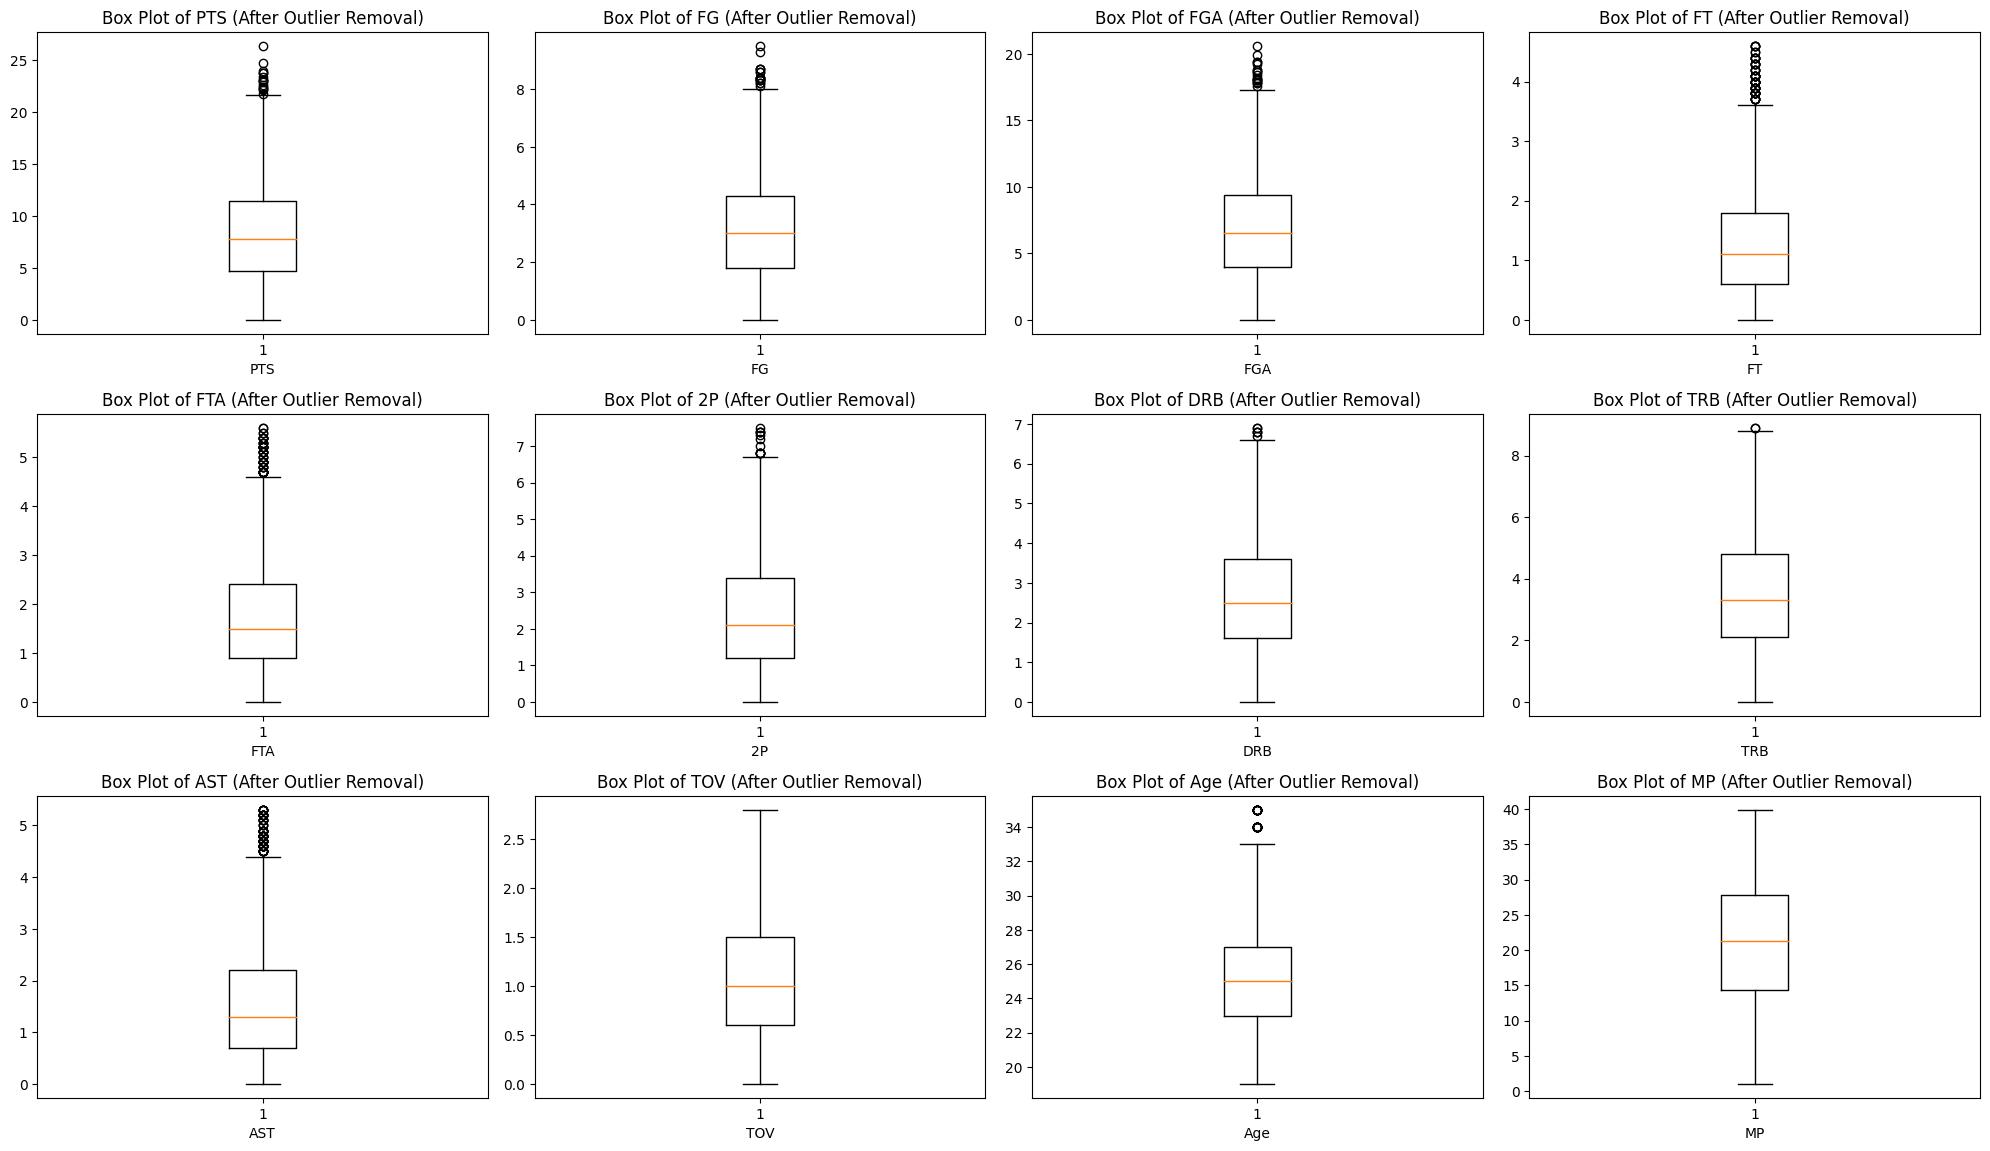

In [ ]:
# Plotting box plots for each feature after outlier removal
plt.figure(figsize=(20, 15))

for i, feature in enumerate(features_to_analyze, 1):
    plt.subplot(4, 4, i)
    plt.boxplot(df_clean[feature])
    plt.title(f'Box Plot of {feature} (After Outlier Removal)')
    plt.xlabel(feature)

plt.tight_layout()
plt.show()

# Modeling

In [ ]:
# Assuming your DataFrame is called df
df_clean['season'] = df_clean['season'].astype('category')
features = ['PTS', 'FG', 'FGA', 'FT', 'FTA', '2P', 'DRB', 'TRB', 'AST', 'TOV', 'Age', 'MP', 'season']
X = df_clean[features]
y = df_clean['salary']

# Split the data into training and validation sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1728, 13) (433, 13) (1728,) (433,)


In [ ]:
from skopt import BayesSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, KFold

# Define the parameter space for Bayesian optimization
param_space = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}

# Initialize the RandomForestRegressor (you can start with a default configuration)
rf = RandomForestRegressor(random_state=42)

# Perform Bayesian Optimization
bayes_search = BayesSearchCV(rf, param_space, n_iter=32, cv=5, scoring='r2', n_jobs=-1, verbose=3, random_state=42)
bayes_search.fit(X_train, y_train)

# Extract the best parameters
best_params = bayes_search.best_params_
print(f"Best parameters found: {best_params}")

# Use the best parameters to initialize the final RandomForest model
rf_best = RandomForestRegressor(**best_params, random_state=42)

# Define the cross-validation strategy (e.g., 5-fold cross-validation)
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation and calculate metrics
cv_scores_mae = cross_val_score(rf_best, X_train, y_train, cv=cv, scoring='neg_mean_absolute_error')
cv_scores_mse = cross_val_score(rf_best, X_train, y_train, cv=cv, scoring='neg_mean_squared_error')
cv_scores_r2 = cross_val_score(rf_best, X_train, y_train, cv=cv, scoring='r2')

# Output cross-validation results
print(f"Cross-Validation MAE: {-cv_scores_mae.mean()} (std: {cv_scores_mae.std()})")
print(f"Cross-Validation MSE: {-cv_scores_mse.mean()} (std: {cv_scores_mse.std()})")
print(f"Cross-Validation R-squared: {cv_scores_r2.mean()} (std: {cv_scores_r2.std()})")

# Train the model on the full training data
rf_best.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_best.predict(X_test)

# Evaluate the model on the test set
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nTest Set Evaluation")
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

In [ ]:
MSE =E ^2MA

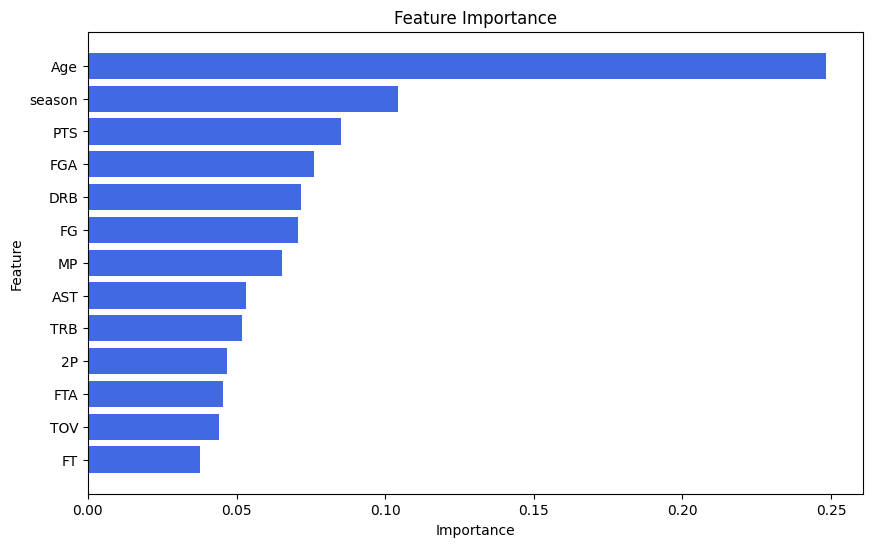

In [ ]:
feature_importances = rf_best.feature_importances_

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='royalblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # To display the highest importance at the top
plt.show()

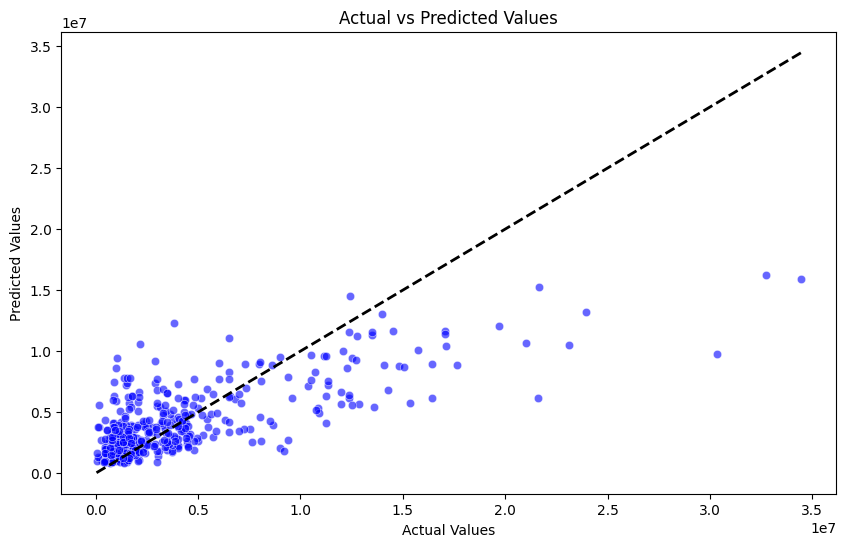

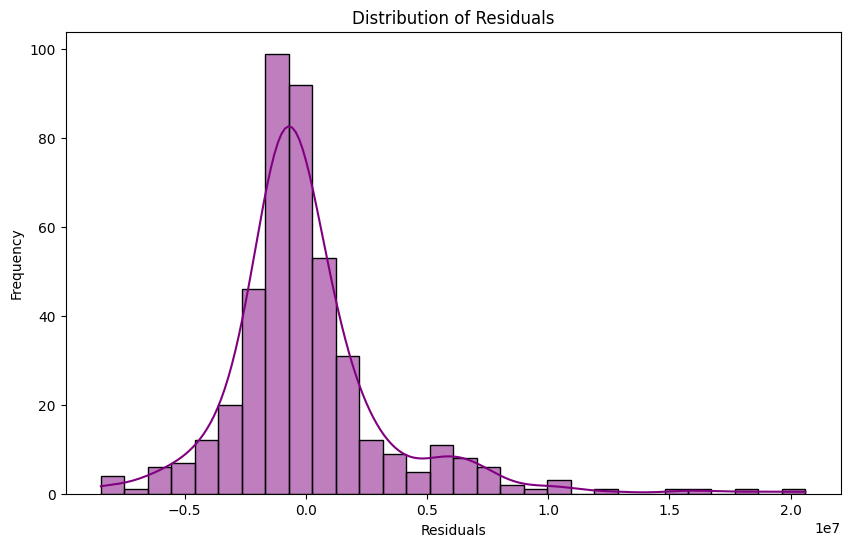

In [ ]:
# Predict on the test set
y_pred = rf_best.predict(X_test)

# Create a scatter plot of actual vs. predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Line y=x for reference
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

# Plot the residuals (errors)
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color='purple', bins=30)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()

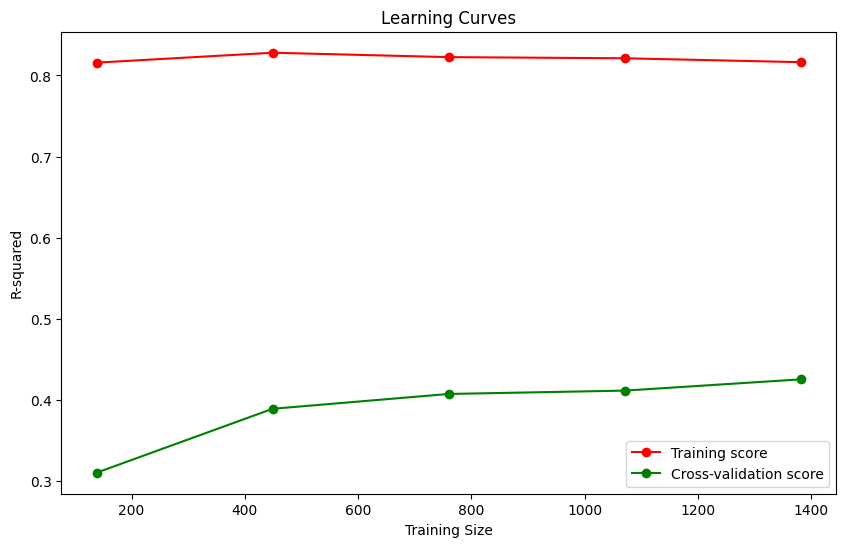

In [ ]:
from sklearn.model_selection import learning_curve

# Generate learning curves
train_sizes, train_scores, test_scores = learning_curve(rf, X_train, y_train, cv=5, scoring='r2', n_jobs=-1)

# Plot learning curves
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores.mean(axis=1), 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores.mean(axis=1), 'o-', color="g", label="Cross-validation score")
plt.title('Learning Curves')
plt.xlabel('Training Size')
plt.ylabel('R-squared')
plt.legend(loc='best')
plt.show()